<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [25]:
import pandas as pd
import folium
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [62]:
df = pd.read_csv('train.csv', sep=';')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294258 entries, 0 to 294257
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   label         294258 non-null  int64  
 1   period        294258 non-null  object 
 2   subject_type  294258 non-null  object 
 3   subject_name  294258 non-null  object 
 4   city_name     294247 non-null  object 
 5   hex           294258 non-null  object 
 6   hex_lat       294258 non-null  float64
 7   hex_lon       294258 non-null  float64
 8   f1            258144 non-null  float64
 9   f2            262930 non-null  float64
 10  f3            265786 non-null  float64
 11  f4            279564 non-null  float64
 12  f5            279564 non-null  float64
 13  f6            281984 non-null  float64
 14  f7            148829 non-null  float64
 15  f8            280209 non-null  float64
 16  f9            280209 non-null  float64
 17  f10           294258 non-null  float64
 18  f11 

In [22]:
df.describe()

,label,hex_lat,hex_lon,f1,f2,f3,f4,f5,f6,f7,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
count,294258.000000,294258.000000,294258.000000,258144.000000,262930.000000,265786.000000,279564.000000,279564.000000,281984.000000,148829.000000,...,286899.000000,286899.000000,286899.000000,167474.000000,167474.000000,167474.000000,167474.000000,167474.000000,286899.000000,286899.000000
mean,0.024149,54.732133,55.154934,0.000573,0.000591,0.000745,0.000902,0.000247,0.157069,0.000169,...,0.158855,0.029383,0.000303,0.118867,0.537152,0.003187,0.008172,0.186825,0.008941,0.000097
std,0.153512,5.101274,27.235237,0.001142,0.001101,0.001267,0.003160,0.001825,0.175730,0.002208,...,0.116387,0.059065,0.001089,0.119459,0.273556,0.005874,0.011134,0.284884,0.011068,0.000929
min,0.000000,41.579243,19.920451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.599710,37.762513,0.000110,0.000120,0.000160,0.000000,0.000000,0.019820,0.000000,...,0.076490,0.000000,0.000000,0.010160,0.535010,0.000000,0.000000,0.009430,0.001730,0.000000
50%,0.000000,55.345232,44.032430,0.000330,0.000350,0.000450,0.000000,0.000000,0.056150,0.000000,...,0.119050,0.000000,0.000000,0.084110,0.630740,0.000000,0.005330,0.036440,0.006410,0.000000
75%,0.000000,56.994743,60.827859,0.000740,0.000760,0.000970,0.000000,0.000000,0.414520,0.000000,...,0.198240,0.039150,0.000000,0.206473,0.705880,0.004850,0.011490,0.276010,0.012170,0.000000
max,1.000000,69.725102,170.350467,0.314800,0.292930,0.279930,0.206900,0.078260,0.995900,0.541940,...,1.000000,1.000000,0.100000,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,0.250000


In [23]:
df.period.value_counts()

2020-08-01    53009
2020-06-01    51504
2020-07-01    41096
2020-11-01    37001
2020-09-01    36142
2020-10-01    35622
2020-05-01    22602
2020-12-01    17282
Name: period, dtype: int64

In [24]:
m = folium.Map(location = [64.6863136, 97.7453061], zoom_start = 3)
coords = df[['hex_lat', 'hex_lon']].values.tolist()
for coordinates in coords:
    folium.Circle(location=coordinates).add_to(m)

In [26]:
def numeric_eda(df, hue=None):
    df = df.drop(['label', 'hex_lon', 'hex_lat'], axis=1)
    print("\nРаспределения численных величин")
    columns = df.select_dtypes(include=np.number).columns
    
    for lim in [[0, 10], [11, 20], [21, 30]]:
        figure = plt.figure(figsize=(20, 10))
        for index, col in enumerate(columns[lim[0]:lim[1]]):
            figure.add_subplot(1, lim[1]-lim[0], index + 1)
            plt.subplots_adjust(wspace=1)
            sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
        plt.show()
    figure.tight_layout()
    plt.show()


def top5(df):
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("\nТоп 5 уникальных значений " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    

def categorical_eda(df):
    print("\nУникальные значения категориальных столбцов")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)

    fig = sns.catplot(x='label', kind="count", data=df, hue=None)
    fig.set_xticklabels(rotation=90)
    plt.title('Баланс')
    plt.show()
    

def eda(df):      
    print("Превью\n")
    display(df.sample(5))
    print("\nИнфо\n")
    print(df.info())

    if df.isna().any(axis=None):
        print("\nПропуски:")
        df.isna().sum()
        missingno.matrix(df)
        plt.show()

    if len(df[df.duplicated()]) > 0:
        print("\nДубликаты:", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nДубликатов нет")

    categorical_eda(df)
    numeric_eda(df)

Превью



,label,period,subject_type,subject_name,city_name,hex,hex_lat,hex_lon,f1,f2,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
226534,0,2020-10-01,Автономный Округ,Ханты-Мансийский Автономный Округ - Югра,Ханты-Мансийск,860b2218fffffff,61.003680,69.030074,0.00014,0.00015,...,0.17244,0.03022,0.00089,NaN,NaN,NaN,NaN,NaN,0.00622,0.0
148496,0,2020-08-01,Область,Самарская,Жигулевск,861081c27ffffff,53.412742,49.499945,0.00013,0.00038,...,0.11392,0.03798,0.00000,NaN,NaN,NaN,NaN,NaN,0.02532,0.0
122891,0,2020-08-01,Область,Саратовская,Пугачев,86108295fffffff,52.033573,48.779967,0.00060,0.00072,...,0.08801,0.03794,0.00000,0.07782,0.72374,0.0,0.00389,0.03113,0.00304,0.0
219070,0,2020-10-01,Автономный Округ,Ямало-Ненецкий,Харп,861049c17ffffff,66.826037,65.756147,0.00063,0.00044,...,0.25000,0.05357,0.00000,0.03571,0.25000,0.0,0.00000,0.07143,0.03571,0.0
157103,0,2020-08-01,Область,Самарская,Самара,86108142fffffff,53.195175,50.153152,0.00026,0.00026,...,0.06452,0.11290,0.00000,0.27027,0.62162,0.0,0.00000,0.00000,0.03226,0.0



Инфо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294258 entries, 0 to 294257
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   label         294258 non-null  int64  
 1   period        294258 non-null  object 
 2   subject_type  294258 non-null  object 
 3   subject_name  294258 non-null  object 
 4   city_name     294247 non-null  object 
 5   hex           294258 non-null  object 
 6   hex_lat       294258 non-null  float64
 7   hex_lon       294258 non-null  float64
 8   f1            258144 non-null  float64
 9   f2            262930 non-null  float64
 10  f3            265786 non-null  float64
 11  f4            279564 non-null  float64
 12  f5            279564 non-null  float64
 13  f6            281984 non-null  float64
 14  f7            148829 non-null  float64
 15  f8            280209 non-null  float64
 16  f9            280209 non-null  float64
 17  f10           294258 non-null  float64
 1

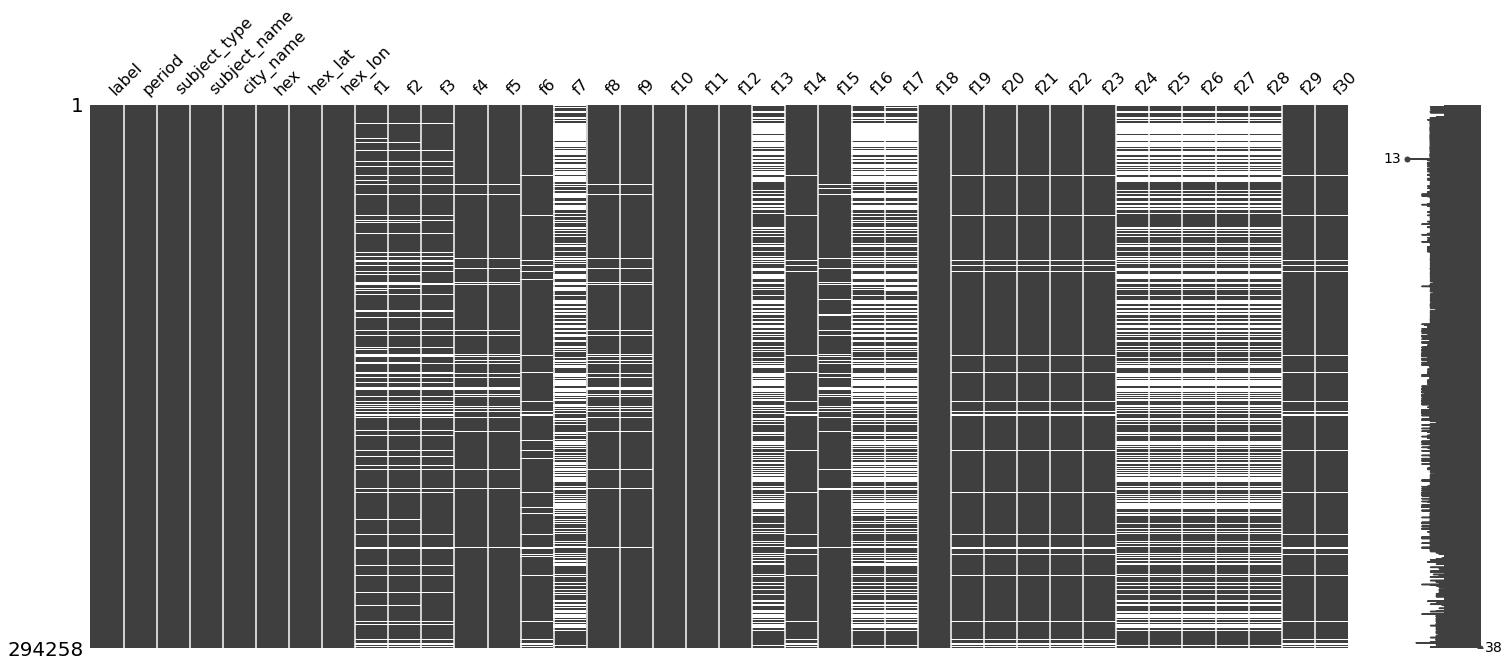


Дубликаты: 305


,label,period,subject_type,subject_name,city_name,hex,hex_lat,hex_lon,f1,f2,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
10637,0,2020-05-01,Город,Москва,Бачурино,8611aa4dfffffff,55.554789,37.536107,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
15322,0,2020-05-01,Город,Москва,Бачурино,8611aa4dfffffff,55.554789,37.536107,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
9624,0,2020-05-01,Город,Москва,Лужки,8611aa59fffffff,55.442557,37.134768,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
25257,0,2020-05-01,Город,Москва,Лужки,8611aa59fffffff,55.442557,37.134768,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
26732,0,2020-05-01,Город,Москва,Лужки,8611aa59fffffff,55.442557,37.134768,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0



Уникальные значения категориальных столбцов
period             8
subject_type       6
subject_name      82
city_name       4633
hex             7250
dtype: int64

Топ 5 уникальных значений period
       period  Count
0  2020-08-01  53009
1  2020-06-01  51504
2  2020-07-01  41096
3  2020-11-01  37001
4  2020-09-01  36142
 

Топ 5 уникальных значений subject_type
       subject_type   Count
0           Область  165193
1              Край   44249
2             Город   38482
3        Республика   36885
4  Автономный Округ    8965
 

Топ 5 уникальных значений subject_name
      subject_name  Count
0           Москва  22606
1  Санкт-Петербург  15876
2    Краснодарский  11140
3       Московская  10994
4    Нижегородская  10371
 

Топ 5 уникальных значений city_name
         city_name  Count
0           Москва  22444
1  Санкт-Петербург  13805
2      Новосибирск   5018
3  Нижний Новгород   4785
4         Тольятти   3616
 

Топ 5 уникальных значений hex
               hex  Count
0  861165aaffff

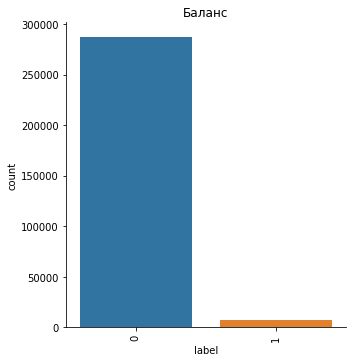


Распределения численных величин


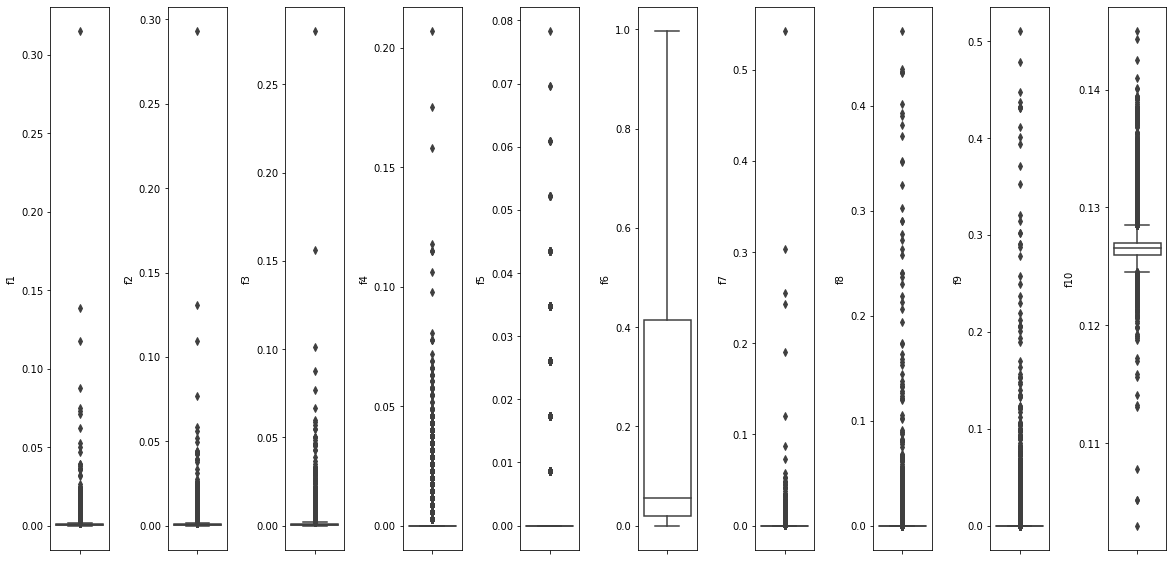

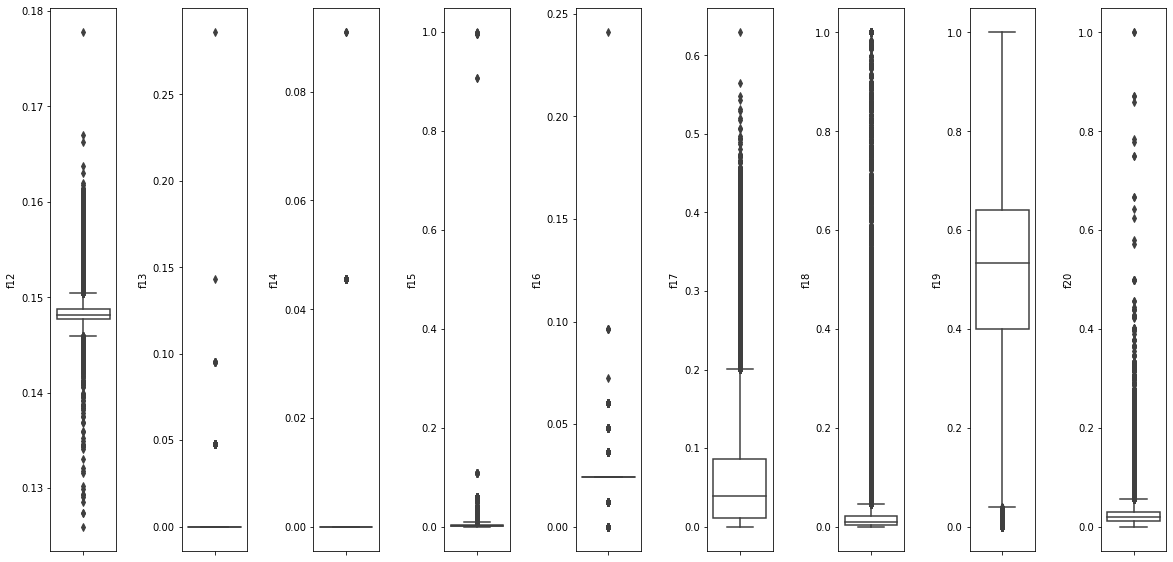

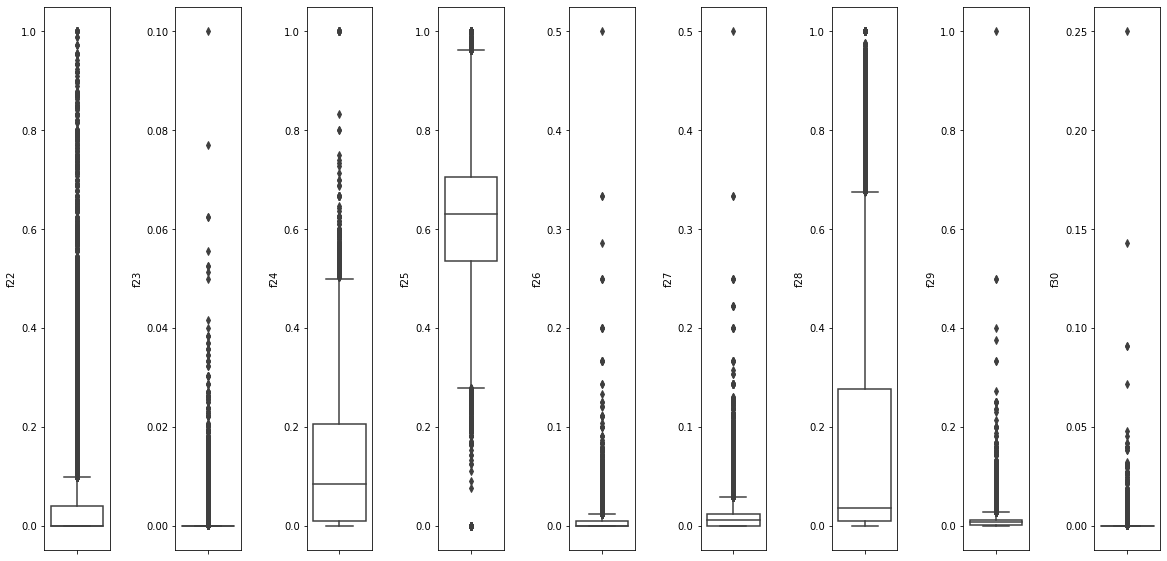

In [27]:
eda(df)

In [52]:
district = ['Центральный', 'Северо-Западный', 'Южный', 'Северо-Кавказский', 
            'Приволжский', 'Уральский', 'Сибирский', 'Дальневосточный']

In [53]:
district_population = [39251, 13942, 16482.5, 9967.3, 29070.8, 12329.5, 17003.9, 8124]

In [54]:
mean_income_district = [46880, 41032.9, 32759.4, 23485.7, 28382, 42555.9, 28406.7, 39822.4]

In [55]:
subject_name = ["Белгородская", "Брянская", "Владимирская", "Воронежская", "Ивановская", 
      "Калужская", "Костромская", "Курская", "Липецкая", "Московская",
      "Орловская", "Рязанская", "Смоленская", "Тамбовская", "Тверская",
      "Тульская", "Ярославская", "Москва", 'Карелия', 'Коми', 'Архангельская',
      'Ненецкий', 'Вологодская', 'Калининградская', 'Ленинградская',
      'Мурманская', 'Новгородская', 'Псковская', 'Санкт-Петербург',
      'Адыгея', 'Калмыкия', 'Крым', 'Краснодарский', 'Астраханская', 
      'Волгоградская', 'Ростовская', 'Севастополь', 'Дагестан', 'Ингушетия',
      'Кабардино-Балкарская', 'Карачаево-Черкесская', 'Северная Осетия - Алания',
      'Чеченская', 'Ставропольский', 'Башкортостан', 'Марий Эл', 'Мордовия',
      'Татарстан', 'Удмуртская', 'Чувашская', 'Пермский', 'Кировская',
      'Нижегородская', 'Оренбургская', 'Пензенская', 'Самарская', 'Саратовская',
      'Ульяновская', 'Курганская', 'Свердловская', 'Тюменская', 
      'Ямало-Ненецкий',
      'Ханты-Мансийский Автономный Округ - Югра', 'Челябинская', 
      'Алтай', 'Тыва', 'Хакасия', 'Алтайский', 'Красноярский', 'Иркутская',
      'Кемеровская Область-Кузбасс', 'Новосибирская', 'Омская', 'Томская', 'Бурятия',
      'Саха /Якутия/', 'Забайкальский', 'Камчатский', 'Приморский',
      'Хабаровский', 'Амурская', 'Магаданская', 'Сахалинская', 'Еврейская',
      'Чукотский']

In [56]:
districts = ['Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный','Центральный',
      'Северо-Западный','Северо-Западный','Северо-Западный','Северо-Западный','Северо-Западный','Северо-Западный','Северо-Западный','Северо-Западный','Северо-Западный','Северо-Западный','Северо-Западный',
      'Южный','Южный','Южный','Южный','Южный','Южный','Южный','Южный',
      'Северо-Кавказский','Северо-Кавказский','Северо-Кавказский','Северо-Кавказский','Северо-Кавказский','Северо-Кавказский','Северо-Кавказский',
      'Приволжский','Приволжский','Приволжский','Приволжский','Приволжский','Приволжский','Приволжский','Приволжский','Приволжский','Приволжский','Приволжский','Приволжский','Приволжский','Приволжский',
      'Уральский','Уральский','Уральский','Уральский','Уральский','Уральский',
      'Сибирский','Сибирский','Сибирский','Сибирский','Сибирский','Сибирский','Сибирский','Сибирский','Сибирский','Сибирский',
      'Дальневосточный','Дальневосточный','Дальневосточный','Дальневосточный','Дальневосточный','Дальневосточный','Дальневосточный','Дальневосточный','Дальневосточный','Дальневосточный','Дальневосточный']

In [57]:
mean_income = [32884, 28636,25955,32102,26284,32559,25786,29791,32534,47301,26990,27328,
          28256,27892,27692,29396,29527,78106,32596,36687,34857,84171,29682,29621,33235,46621,
          26431,26444,49375,30320,19816,23033,37352,25206,24995,31519,29970,27666,
          16877,22016,19101,23963,24625,24188,30409,21271,20635,35694,25461,21165,
          30237,24292,33814,24731,24135,29973,24095,24596,21865,37447,31851,90130,
          54588,26647,21683,18975,23843,23917,32872,27577,25441,31606,27377,28871,
          26222,46344,27048,55381,37349,41751,35508,70982,60797,28126,89548]

In [58]:
population = [1541.3, 1182.7, 1342.1, 2305.6, 987, 1001, 628.4, 1096.5, 1128.2,
              7708.5, 724.7, 1098.3, 921.1, 994.4, 1245.6, 1449.1, 1241.4, 12655.1,
              609.1, 813.6, 1082.7, 44.4, 1151, 1018.7, 1892.7, 732.9, 592.4, 620.2,
              5384.3, 463.2, 270, 1901.5, 5683.9, 997.8, 2474.6, 4181.5, 510, 3133.3,
              515.5, 869.2, 465.4, 693.1, 1498, 2792.8, 4013.8, 675.3, 779, 3894.1,
              1493.4, 1207.9, 2579.2, 1250.2, 3176.5, 1942.9, 1290.9, 3154.2, 2395.1,
              1218.3, 818.6, 4290, 1543.4, 547, 1687.7, 3442.8, 221, 330.4, 532,
              2296.4, 2855.9, 2375, 2633.4, 2785.8, 1903.7, 1070.3, 985.4, 982,
              1053.5, 311.7, 1877.8, 1301.1, 781.9, 139, 485.6, 156.5, 49.5]

In [63]:
dict_subject = {'subject_name': subject_name, 'mean_income_subject': mean_income,
                'subject_population': population, 'district': districts}
dict_district = {'district_population': district_population, 'district': district, 'mean_income_district': mean_income_district}
subject_df = pd.DataFrame(data=dict_subject)
district_df = pd.DataFrame(data=dict_district)

In [64]:
df = df.merge(subject_df, how='inner')
df = df.merge(district_df, how='inner')

In [65]:
df.head()

,label,period,subject_type,subject_name,city_name,hex,hex_lat,hex_lon,f1,f2,...,f26,f27,f28,f29,f30,mean_income_subject,subject_population,district,district_population,mean_income_district
0,1,2020-05-01,Город,Москва,Москва,8611aa7a7ffffff,55.729458,37.516569,0.00101,0.00103,...,NaN,NaN,NaN,0.01737,0.0,78106,12655.1,Центральный,39251.0,46880.0
1,1,2020-05-01,Город,Москва,Москва,8611aa01fffffff,55.975851,37.237085,0.00000,0.00027,...,NaN,NaN,NaN,0.01152,0.0,78106,12655.1,Центральный,39251.0,46880.0
2,1,2020-05-01,Город,Москва,Москва,861181b6fffffff,55.622721,37.695121,0.00339,0.00313,...,0.00526,0.02105,0.00000,0.01540,0.0,78106,12655.1,Центральный,39251.0,46880.0
3,1,2020-05-01,Город,Москва,Москва,8611aa017ffffff,55.941586,37.157487,0.00048,0.00054,...,NaN,NaN,NaN,0.01495,0.0,78106,12655.1,Центральный,39251.0,46880.0
4,1,2020-05-01,Город,Москва,Москва,8611aa637ffffff,55.797494,37.676200,0.00164,0.00179,...,0.01111,0.04444,0.01111,0.01266,0.0,78106,12655.1,Центральный,39251.0,46880.0


In [66]:
df.to_csv('train_catugra.csv')